In [7]:
import csv
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.stats.weightstats

filename='C:/Users/Bas/Google Drive/Bas Games/Analysis/Turing/turing_output.csv'
T = np.array(list(csv.reader(open(filename, "r"), delimiter=",")))[1:,:]


C:\Users\Bas\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


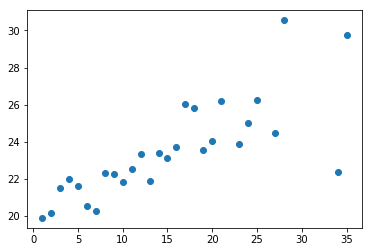

C:\Users\Bas\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


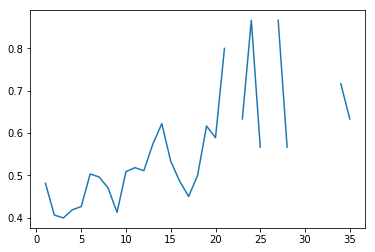

In [8]:
l=T[:,2].astype('int')
c=T[:,5].astype('float')
conf=np.abs(50-T[:,3].astype('float'))

plt.plot(np.bincount(l,weights=conf)/np.bincount(l),'o')
plt.show()

plt.plot(np.bincount(l,weights=T[:,3].astype('int')>50)/np.bincount(l))
plt.show()


In [9]:
data = pd.DataFrame({'x': l, 'y': c})
r1=sp.pearsonr(l,c)[0]
s=statsmodels.stats.weightstats.DescrStatsW(data, weights=50-conf, ddof=0)
r2=s.cov[0,1]/(s.std[0]*s.std[1])
print(r1,r2)
np.mean(c)

0.0343046847517 0.0459248368024


0.54891405234824575

In [10]:
model = ols("y ~ x", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.345
Date:                Wed, 31 Jan 2018   Prob (F-statistic):             0.0118
Time:                        22:16:54   Log-Likelihood:                -3880.8
No. Observations:                5387   AIC:                             7766.
Df Residuals:                    5385   BIC:                             7779.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5239      0.012     43.562      0.0

In [11]:
def f(p): return p*np.log(p)+(1-p)*np.log(1-p)

In [6]:
f(0.526)-f(0.5)

0.0013526099613098141